In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset = pd.read_csv("C:\\Users\\PULKIT\\Downloads\\cancer.csv")
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

dataset.head()
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


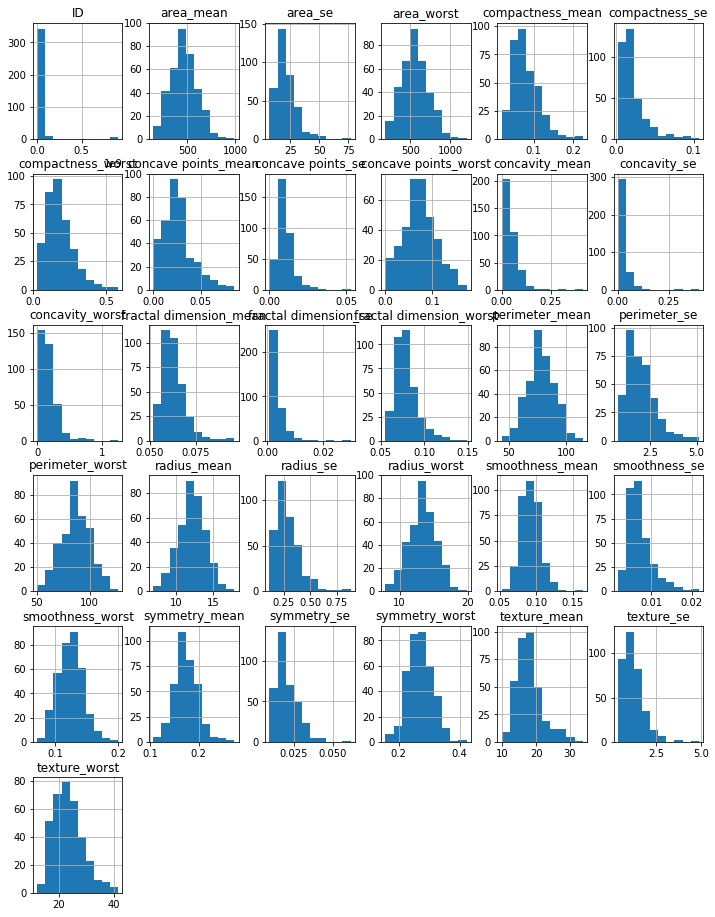

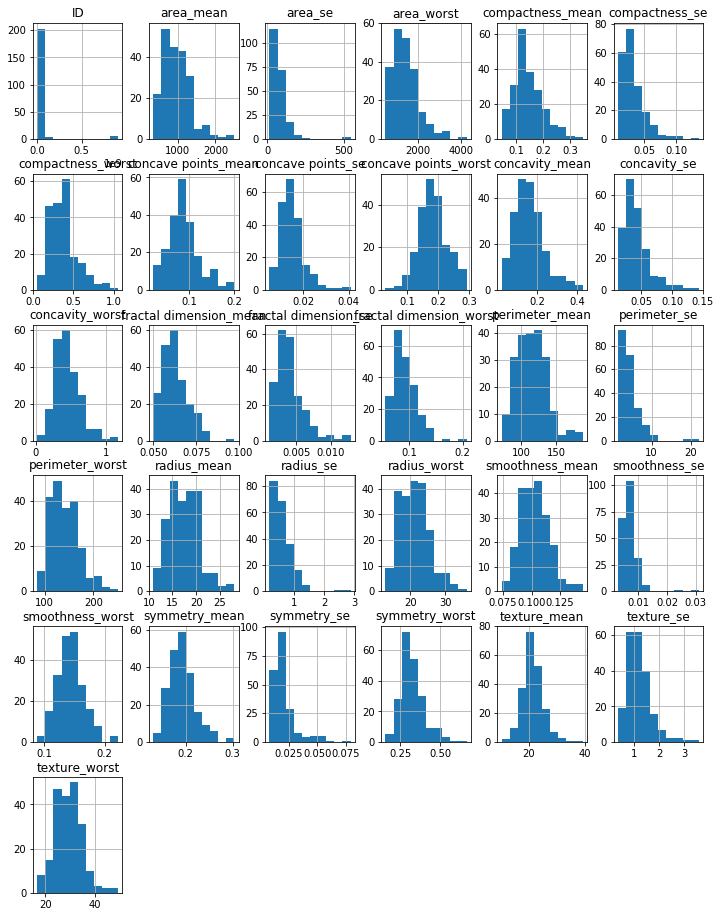

In [30]:
dataset.groupby('diagnosis').size()

#Visualization of data
dataset.groupby('diagnosis').hist(figsize=(12, 16))

dataset.isnull().sum()
dataset.isna().sum()

dataframe = pd.DataFrame(Y)

In [23]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

C:\Users\PULKIT\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
Y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
c = print(cm[0, 0] + cm[1, 1])

141


In [29]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.986013986013986